<a href="https://colab.research.google.com/github/xochi7l/DTSC5301FinalReport/blob/main/Final_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ransomware Analysis
Authors:
<br>Emaje Hall, Wyatt Babb, and Xochitl Ryan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Question of Interest:

### How does rebooting an Android device impact ransomware infection?

# Background and Variables:
&emsp; Android devices have dominated the global market since inception. Despite iOS popularity and dominance in the US, Android still retained 70.77% of the global market as of August 2023 (Afzal, 2023). A captive audience of this proportion provides substantial opportunity for both hackers and criminals to infect, steal, and threaten large populations. One such method used is ransomware, a particular kind of malware that “[kidnaps] the victim’s data by encrypting it and threatening to deny access to it until a ransom is paid” (Young & Yung). Using the CCCS-CIS-AndMal2020 dataset allows for dynamic analysis measuring the change in ransomware execution before and after a system reboot. Created by the Canadian Institute for Cybersecurity (CIC) project in collaboration with the Canadian Centre for Cyber Security (CCCS) and provided by the University of New Brunswick, the dataset is “[comprised of] 12 Android malware categories and 147 malware families that are dynamically analyzed in an emulated environment.” Such parameters in the original data allow researchers to record the processes of malware that may attempt to conceal itself upon initial infection (David Sean Keyes et al., 2021).
<br>
<br>
&emsp; For ransomware in particular, this involves dividing each type of ransomware into one of 7 family’s and one unknown category, <i>koler, lockscreen, congur, masnu, jisut, smsspy, and slocker</i>, and recording each process in emulation before and after the reboot. Each of the 8 group’s corresponds to a different style of execution the ransomware can perform. The following analysis looks at three different features (extracted from all 8 group’s) more intimately to measure how a system reboot affects ransomware execution. Total Processes is the count of every unique process that occurs in total, Battery Wakelock is a measure of each of the malware’s requests to keep the device awake, and Total API Sessions is a measure of how many different APIs are active over the course of emulation.


In [2]:
# "Ransomware is a malware designed to deny a user or organization
# access to files on their computer. By encrypting these files and
# demanding a ransom payment for the decryption key, cyberattackers
# place organizations in a position where paying the ransom is the
# easiest and cheapest way to regain access to their files."

ransomwareBefore = pd.read_csv(r"/content/AndMal2020-dynamic-BeforeAndAfterReboot/Ransomware_before_reboot_Cat.csv")
ransomwareAfter = pd.read_csv(r"/content/AndMal2020-dynamic-BeforeAndAfterReboot/Ransomware_after_reboot_Cat.csv")

FileNotFoundError: ignored

A visualization of the enitre data set is displayed below. The amount of malware present in the system before and after the reboot of the system are categorized by type. We repeatedly see that for each malware type, the malware presence is greater before a system reboot.


In [ ]:
import os

## Change working directory to where csvs are stored
os.chdir("/content/AndMal2020-dynamic-BeforeAndAfterReboot")

## upload csvs that contain before using a for loop so I can make a dummy for before and after reboot for comparisons
before_files = [f for f in os.listdir() if '_before_' in f]
dfs = []
for csv in before_files:
    df = pd.read_csv(csv)
    dfs.append(df)
AndMal2020Before = pd.concat(dfs, ignore_index = True)
AndMal2020Before['After'] = 0
AndMal2020Before.head()


##Same thing but for after reboot
after_files = [f for f in os.listdir() if '_after_' in f]
dfs = []
for csv in after_files:
    df = pd.read_csv(csv)
    dfs.append(df)
AndMal2020After = pd.concat(dfs, ignore_index = True)
AndMal2020After['After'] = 1
AndMal2020After.head()


##Concatenating the two dataframes using concat so key is not necessary
AndMal2020 = pd.concat([AndMal2020Before, AndMal2020After], ignore_index= True)
AndMal2020.head()


##Looking at differences in before and after quantities (sums will provide me with the data to be used for graphing due to dummy present)
Category_sums = AndMal2020.groupby(['Category','After']).count()
##(order total threats to properly order histogram see sns.catplot(order))
Category_sort = Category_sums.groupby('Category').sum()
Category_sorted = Category_sort['Memory_ParcelCount'].sort_values(ascending = False)


## Barplot showing before and after values of each category based on a reboot --- THIS one shows before and after next to one another
ax = sns.catplot(data = Category_sums.reset_index(),
            x = "Category",
            y = 'Memory_PssTotal',
            hue = 'After',
            kind = 'bar',
            legend=False,
            order=['Riskware', 'Adware', 'Trojan', 'Zero_Day', 'Ransomware', 'Trojan_Spy', 'Trojan_SMS', 'No_Category', 'Trojan_Dropper', 'PUA', 'Backdoor', 'Scareware', 'FileInfector', 'Trojan_Banker']
            )
plt.xticks(rotation = 90)
plt.ylabel('Quantity')
plt.legend(title = 'Malware Present',
           loc = 'best'
           )
plt.title('Malware Present Before(0) and After(1) Reboot')
plt.show()

In [ ]:
 '''
 Ransomware Dynamic Features Analysis:
 Memory - features define activities performed by malware by utilizing memory.
 App Programming Interface (API) - features delineate the communication between two applications.
 Network - features describe the data transmitted and received between other devices in the network.
           It indicates foreground and background network usage.
 Battery - features describe the access to battery wakelock and services by malware
 Logcat - features write log messages corresponding to a function performed by malware
 Process - features count the interaction of malware with total number of processes.
'''

# Investigations and Analysis:
&emsp; Given the dataset, we chose to use stacked kernel density estimate (KDE) plots to visualize the features of the ransomware. Preference was given to KDE plots since they are easily interpretable in comparison to often-cluttered histograms. Likewise, Seaborn's visualization library was selected for its ease-of-use. By using the hue parameter of Seaborn’s distribution plot function, we could quickly visualize and compare the behavior of various ransomware families before and after system reboots.
<br>
<br>
&emsp; We took a particular interest in API sessions, as ransomware generally relies on a system’s API to execute its tasks. Similarly, observing the activity of total processes before and after a reboot would give us a better understanding of overall execution of the ransomware. Given the nature of this malware, it was also presumed that an analysis of the battery wakelock could aid in further understanding of why ransomware frequently executes uninterrupted – considering that some families of ransomware do more than restrict access to files, but encrypt them as well.


(0.0, 0.3)

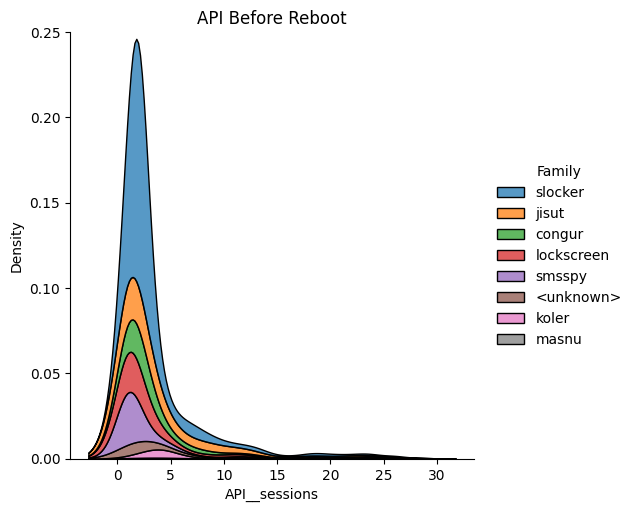

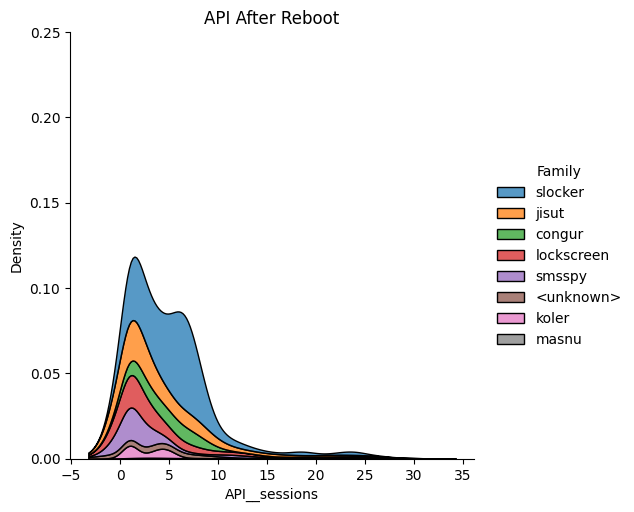

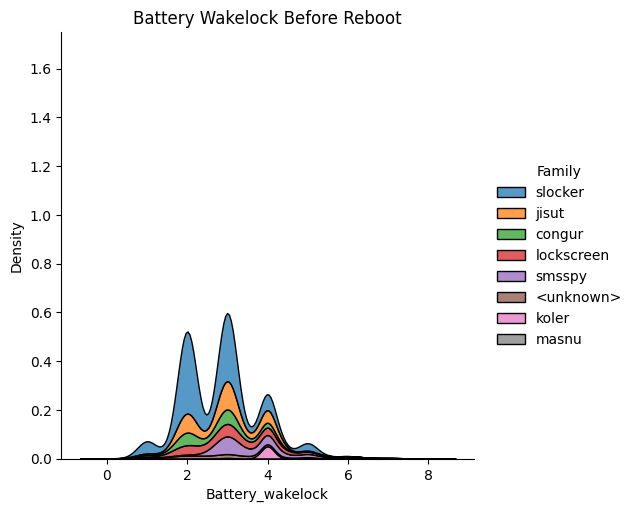

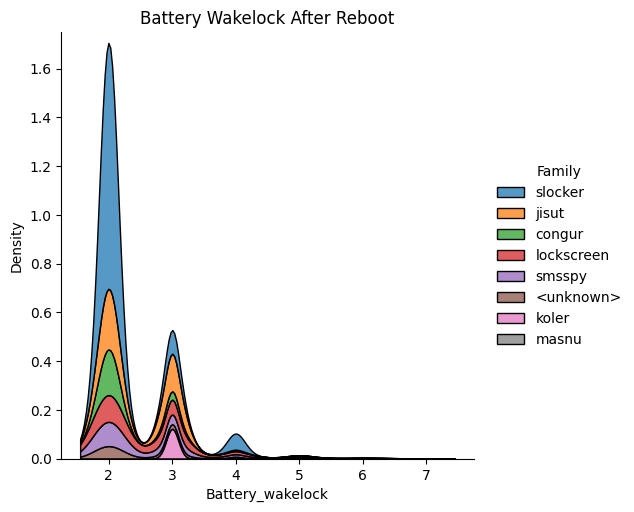

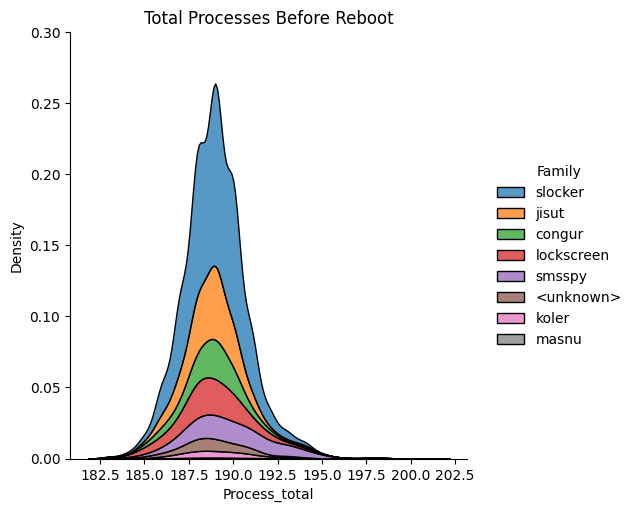

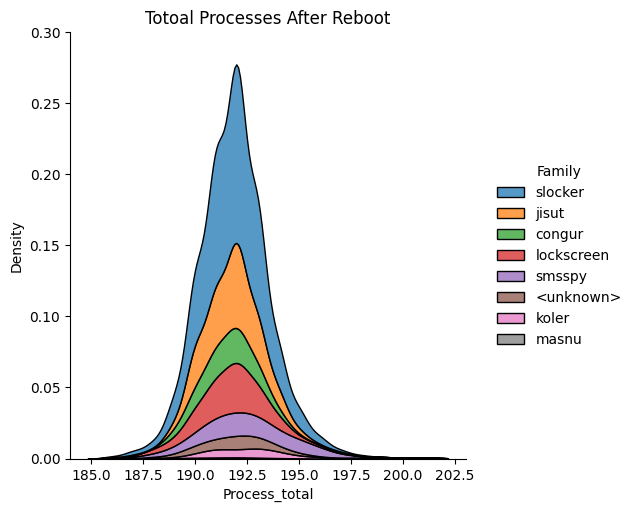

In [ ]:
# Example visualizations for compartitive analysis

# Alternative visualization for App Programming Interface (API)
# App Programming Interface (API) - features delineate the communication between two applications.
myVector = (['slocker','jisut','congur','lockscreen','smsspy','<unknown>','koler','masnu'])
sns.displot(data = ransomwareBefore, x='API__sessions', hue = 'Family',kind = 'kde', multiple = 'stack',warn_singular=False, hue_order = myVector).set(title='API Before Reboot')
plt.ylim(0, 0.25)
sns.displot(data = ransomwareAfter, x='API__sessions', hue = 'Family',kind = 'kde', multiple = 'stack',warn_singular=False, hue_order = myVector).set(title='API After Reboot')
plt.ylim(0, 0.25)

# Alternative visuals for the battery wakelock feature
# Battery - features describe the access to battery wakelock and services by malware
myVector = (['slocker','jisut','congur','lockscreen','smsspy','<unknown>','koler','masnu'])
sns.displot(data = ransomwareBefore, x='Battery_wakelock', hue = 'Family',kind = 'kde', multiple = 'stack',warn_singular=False, hue_order = myVector).set(title='Battery Wakelock Before Reboot')
plt.ylim(0, 1.75)
sns.displot(data = ransomwareAfter, x='Battery_wakelock', hue = 'Family',kind = 'kde', multiple = 'stack',warn_singular=False, hue_order = myVector).set(title='Battery Wakelock After Reboot')
plt.ylim(0, 1.75)

# Alternate Total Processes Viualization
# Process - features count the interaction of malware with total number of processes.
myVector = (['slocker','jisut','congur','lockscreen','smsspy','<unknown>','koler','masnu'])
sns.displot(data = ransomwareBefore, x='Process_total', hue = 'Family',kind = 'kde', multiple = 'stack',warn_singular=False, hue_order = myVector).set(title='Total Processes Before Reboot')
plt.ylim(0, 0.3)
sns.displot(data = ransomwareAfter, x='Process_total', hue = 'Family',kind = 'kde', multiple = 'stack',warn_singular=False, hue_order = myVector).set(title='Totoal Processes After Reboot')
plt.ylim(0, 0.3)

# Conclusions and Insights:
&emsp; The analysis of our data showed that in most comparisons of the feature categories there were less activities performed by the ransomware after the reboot of the system, this general trend can be seen in the visualization of the total dataset. One example of this trend in the extracted features is shown in the first figure of App Programming Interface interactions. This trend could suggest that the effectiveness of the malware is negatively impacted by a reboot of the system. However, our analysis of the Battery Wakelock feature category displayed direct opposition to this trend, with more access to battery wakelock and services by malware after the reboot than had occurred beforehand. Additionally, the Total Processes feature category showed little to no impact from the reboot of the system. Altogether this would suggest that the interactions between the malware and the system generally decreasing after a reboot is due to the ransomware already completing the majority of its processes before the reboot, not the reboot being able to stop them from occurring at all. Further, this analysis suggests that rebooting is actually more detrimental to the system in the case of a ransomware infection, as a reboot allows the malware to complete processes that otherwise would have remained dormant.

### Possible Sources of Bias
&emsp; Addressing some sources of bias in this data, there is possibly a bias introduced to the data via the ML method of utilizing classifiers to classify malware categories and families. It is disclosed in the source of our data set that, within the ransomware data, 50 samples of the congur family were incorrectly classified as a part of the slocker family. (David Sean Keyes et al.) This is important to keep in mind in our analysis. However, it is also important to note that there were 998 total slocker family samples and 252 total congur family samples taken.


# References
&emsp; Abir Rahali, Arash Habibi Lashkari, Gurdip Kaur, Laya Taheri, Francois Gagnon, and Frédéric Massicotte, "DIDroid: Android Malware Classification and Characterization Using Deep Image Learning", 10th International Conference on Communication and Network Security (ICCNS2020), Pages 70–82, Tokyo, Japan, November 2020
UNB. University of New Brunswick est.1785. (n.d.). https://www.unb.ca/cic/datasets/andmal2020.html
<br>
<br>
&emsp; Afzal, Maleha. “IOS vs Android Market Share by Country: Top 30 Countries Using iPhones.” Yahoo! Finance, Yahoo!, 9 Sept. 2023, https://finance.yahoo.com/news/ios-vs-android-market-share-135251641.html
<br>
<br>
&emsp; A. L. Young and M. Yung, "On Ransomware and Envisioning the Enemy of Tomorrow," in Computer, vol. 50, no. 11, pp. 82-85, November 2017, doi: 10.1109/MC.2017.4041366.
<br>
<br>
&emsp; David Sean Keyes, Beiqi Li, Gurdip Kaur, Arash Habibi Lashkari, Francois Gagnon, Frederic Massicotte, "EntropLyzer: Android Malware Classification and Characterization Using Entropy Analysis of Dynamic Characteristics", Reconciling Data Analytics, Automation, Privacy, and Security: A Big Data Challenge (RDAAPS), IEEE, Canada, ON, McMaster University, 2021
<br>
<br>
&emsp; Simoiu, C., Goel, S., Gates , C., and Bonneau, J. (n.d.). “I was told to buy a software or lose my ... - Stanford University. https://web.stanford.edu/~csimoiu/doc/2019_ransomware_SOUPS.pdf
